## **Name:** Brian Ryu

## **Computing ID:** kfg2ec

# Lab 2: Machine Learning Evaluation (100 Points)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1_fA3v_ecZ9s2ftcC1nIj_7tLtnJHg6VG?usp=sharing)

In [2248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

# **Part 1: Data Cleaning (40 Points)**

## **Question 1 (5 points):**
## Open the included dataset "messy_Q1.xlsx" using a **spreadsheet application** like Excel and observe the structure of the sheet. In a text cell, briefly answer these questions in a few sentences:

## 1. Identify 3 or more issues that will need to be cleaned before you can encode data or extract quantitative metrics.

**I anticipate I will need to check for missing values and...**
1. Making sure there is no extra/corrupted column names such as Excel Man..., Yikes, or Evil
2. Extra header rows and blank rows; it does not start at the top corner of the sheet
3. Difficult to tell which metric means what; all labeled as Metric_#
4. Inconsistent $ or symbols such as - required in columns
5. Date and Quarter not properly organized or sorted
6. Various numbers or boxes with white text making it hard to read

## 2. Just by looking at the first column titled "Return AB", what number do you anticipate its average will be around? Why?

**I think the average will be around** 9717.565 **because the minimum and maximum values are...** 8911.13 and 10524

## **Question 2 (10 points):**
## Read in and load the included dataset "messy_Q1.xlsx" as a Pandas DataFrame. When directly reading in the raw data, what happens when you call df.columns on the DataFrame?

In [2249]:
df = pd.read_excel("messy_Q1.xlsx")

df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Excel Man…', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Hi 3001!', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Yikes', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Evil'],
      dtype='object')

**I see that the columns don't include the actual...** dataset because there are a lot of rows that are either empty or incorrectly formatted in the first few spaces of the Excel sheet. The actual headers are further down which means that the dataset should be cleaned before use.

## Get rid of extra or leading columns and rows using any combination of Pandas functions. Verify you have done so by running df.columns again on the trimmed dataset and verifying you have 16 columns and 200 rows. Ensure the columns are read in as the row starting with "Date" and ending in "Target".


Reference Code:

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
* https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe
* https://stackoverflow.com/questions/40389018/dropping-multiple-columns-from-a-dataframe

In [2250]:
# Trimming code
df = pd.read_excel("messy_Q1.xlsx", header=7, usecols="F:U")

df = df.dropna(axis=0, how='all') # Gets rid of empty rows
df = df.dropna(axis=1, how='all') # Gets rid of empty columns

df.info()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       200 non-null    int64  
 1   Quarter    200 non-null    int64  
 2   Return_AB  184 non-null    object 
 3   Metric_2   187 non-null    object 
 4   Metric_3   178 non-null    object 
 5   Metric_4   179 non-null    object 
 6   Metric_5   187 non-null    object 
 7   Metric_6   183 non-null    object 
 8   Metric_7   188 non-null    object 
 9   Metric_8   180 non-null    object 
 10  Metric_9   183 non-null    object 
 11  Metric_10  176 non-null    object 
 12  Metric_11  182 non-null    object 
 13  Metric_12  183 non-null    object 
 14  Metric_13  184 non-null    object 
 15  Target     200 non-null    float64
dtypes: float64(1), int64(2), object(13)
memory usage: 25.1+ KB


Index(['Date', 'Quarter', 'Return_AB', 'Metric_2', 'Metric_3', 'Metric_4',
       'Metric_5', 'Metric_6', 'Metric_7', 'Metric_8', 'Metric_9', 'Metric_10',
       'Metric_11', 'Metric_12', 'Metric_13', 'Target'],
      dtype='object')

## **Question 3 (10 points):**
## Read in and clean all columns in your DataFrame to be complete (no missing values) Pandas columns with only numerical values (integer or float).  

## Once done, show proof that all columns are numerical and there are no missing values in any columns. For example, you may choose to count or compute percentages of NaN values by column.

In [2251]:
# Cleaning code
df = df.replace("[^0-9.]", "", regex=True) # Remove non-numeric characters such as $ or -

df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [2252]:
# Proof of numerical data types
print(df.dtypes)

Date           int64
Quarter        int64
Return_AB    float64
Metric_2     float64
Metric_3     float64
Metric_4     float64
Metric_5     float64
Metric_6     float64
Metric_7     float64
Metric_8     float64
Metric_9     float64
Metric_10    float64
Metric_11    float64
Metric_12    float64
Metric_13    float64
Target       float64
dtype: object


In [2253]:
# Proof of no missing values
print(df.isnull().sum())

Date         0
Quarter      0
Return_AB    0
Metric_2     0
Metric_3     0
Metric_4     0
Metric_5     0
Metric_6     0
Metric_7     0
Metric_8     0
Metric_9     0
Metric_10    0
Metric_11    0
Metric_12    0
Metric_13    0
Target       0
dtype: int64


## **Question 4 (5 points):**
## Compute the mean of column "Return AB" using Pandas or NumPy. Discuss in a text cell if the mean matches your initial assumption in Question 1. If not, why do you think the actual value is different? Re-explore the sheet in a spreadsheet application if needed.

In [2254]:
# Report mean
print(df["Return_AB"].mean())

10881.492692307693


**The real mean is very not different than my initial guess....** because I believe that there were some values that were either too big or removed during the cleaning process due to an issue with how the values were formatted. However, it is true that the value is different from my original guess as there seems to have been hidden values that were in a different color such as white which blended in, making it difficult to see when just looking for min and max values.


P.S. I am unsure where the 1151400000000000000 in H:33 went when cleaning. I think the mean should be much larger.

## **Question 5 (10 points):**
## Make the following sequential transformations in your DataFrame.

## 1. Make a **new column** called "quarter_string" that takes the column "quarter" and appends the string "Q-" before every value.
For example, if "quarter" contains 1, then "quarter_string" should contain "Q-1".

Similarly, if "quarter" contains 3, then "quarter_string" should contain. "Q-3".

In [2255]:
# New column code
df["quarter_string"] = "Q-" + df["Quarter"].astype(str)

## 2. Encode quarter_string using **any** appropriate encoding method. In a text cell, justify why this is an appropriate encoding method in a few sentences.

In [2256]:
# Encoding code
df = pd.get_dummies(df, columns=['quarter_string']).astype(int)

The encoding method I used was one-hot encoding. This is an appropriate encoding method because the new column "quarter_string" is a catergorical with no ordinal relationship. This also helps get rid of misconceptions of possibily thinking that Q-4 is more bigger or important than Q-1. This shows what is included in each category independently. This also makes it very easy to see visually and interpretable.

## 3. **Remove** the original "quarter" column to avoid redundant data features. If (and only if) you created new columns during encoding then **remove** the "quarter_string" column as well.

In [2257]:
# Removing column(s)
df = df.drop(columns=["Quarter"])

## 4. Normalize all your numerical columns using **any** appropriate normalization method. Justify why this is an appropriate normalization method in a few sentences.

In [2258]:
# Normalizing code
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())


I have used the Min-Max normalization. This is an appropriate normalization method because there are a varying number of different scales in all the columns. This normalization rescales all of the data to the same range of (0,1) allowing a well balanced distribution not impacted by the scale. This way also preserves relative distances between the values. It is also very simple, interpretable, and nice for datasets with varying magnitudes.

## 5. Finally, make a DataFrame that displays the **min, max, and standard deviation** of all numerical columns in your final clean dataset.

In [2259]:
# DataFrame summary of numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

new_df = df[numeric_cols].agg(['min', 'max', 'std']).transpose().reset_index()

new_df.columns = ['Column', 'Min', 'Max', 'Std Dev']

new_df


,Column,Min,Max,Std Dev
0,Date,0.0,1.0,0.252337
1,Return_AB,0.0,1.0,0.247489
2,Metric_2,0.0,1.0,0.259017
3,Metric_3,0.0,1.0,0.227102
4,Metric_4,0.0,1.0,0.272341
5,Metric_5,0.0,1.0,0.265363
6,Metric_6,0.0,1.0,0.274510
7,Metric_7,0.0,1.0,0.258166
8,Metric_8,0.0,1.0,0.266186
9,Metric_9,0.0,1.0,0.263218


# **Part 2: Model Evaluation (30 Points)**

In Part 2, you may choose to use the cleaned dataset from Part 1 for model evaluation, **or read in a new dataset.**

*Example New Datasets:*
*  Tidy Tuesday: https://github.com/rfordatascience/tidytuesday/tree/main/data
*  Hugging Face: https://huggingface.co/datasets/nateraw/airplane-crashes-and-fatalities
* Kaggle: https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv
* Kaggle: https://www.kaggle.com/datasets/mahnazarjmand/breast-cancer-data?resource=download

### Dataset Loading

In [2260]:
# Load in DataFrame


Will continue using the cleaned dataset from Part 1

In [2261]:
# Cleaning code (if necessary for new dataset)

## **Question 1 (5 points):**
## Implement a train test split with a ratio of your choosing for the training and test datasets.

In [2262]:
# Separate features (X) and target (y)
x = df.drop(columns=["quarter_string_Q-1"]) 
y = df["quarter_string_Q-1"]

In [2263]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## **Question 2 (5 points):**
## Instantiate and fit a vanilla (default) logistic regression classifier and a K-Nearest Neighbor model with k=3 on your clean datasets and target.

In [2264]:
# Default models
log_reg = LogisticRegression()

knn = KNeighborsClassifier(n_neighbors=3)

In [2265]:
# Fit
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## **Question 3 (5 points):**
## Next, familiarize yourself with the sklearn documentation for each model and their parameters. Pick 2 parameters that you want to adjust from their default values in each of the models.
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Instantiate and fit a logistic regression classifier and a K-Nearest Neighbor model with these updated parameters on your clean datasets and target.

In [2266]:
# Logistic Regression tuned parameters
log_reg_tuned = LogisticRegression(penalty='l1', solver='saga')
log_reg_tuned.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [2267]:
# KNN tuned parameters
knn_tuned = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='auto', metric='minkowski', p=2)
knn_tuned.fit(X_train, y_train)

,n_neighbors,7
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## **Question 4 (10 points):**
## Compile the following metrics for all 4 of your models into one DataFrame called metrics_df. Each model should have each metric reported.

* Accuracy Score
* Precision
* Sensitivity/Recall
* Specificity
* F1 Score

## The first column of metrics_df has been created for you.

In [2268]:
# Added zero_division to avoid errors/warnings
def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) != 0 else 0
    return [acc, prec, rec, spec, f1]

# Predicitons for each model stuff
y_pred_log = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_log_tuned = log_reg_tuned.predict(X_test)
y_pred_knn_tuned = knn_tuned.predict(X_test)

# Compile metrics
metrics = {
    "Logistic (Default)": get_metrics(y_test, y_pred_log),
    "KNN (Default)": get_metrics(y_test, y_pred_knn),
    "Logistic (Tuned)": get_metrics(y_test, y_pred_log_tuned),
    "KNN (Tuned)": get_metrics(y_test, y_pred_knn_tuned)
}

metrics_df = pd.DataFrame(metrics, index=["Accuracy Score", "Precision", "Sensitivity/Recall", "Specificity", "F1 Score"]).T
metrics_df



,Accuracy Score,Precision,Sensitivity/Recall,Specificity,F1 Score
Logistic (Default),0.500,0.0,0.00,1.0,0.000000
KNN (Default),1.000,1.0,1.00,1.0,1.000000
Logistic (Tuned),0.500,0.0,0.00,1.0,0.000000
KNN (Tuned),0.875,1.0,0.75,1.0,0.857143


## **Question 5 (5 points):**
## Briefly summarize the results of your simple model tuning in a text cell. Did tuning significantly change any model metrics? Why might accuracy not be a good choice for model evaluation for your specific dataset and data domain?

**Tuning parameters slightly changed the performance of both models. For Logistic Regression...** the results were still the same and very poor. The model had only predicted one class and got low preicion and recall. Tuning did change the numbers for KNN, but not for Logisitic. This is probably due to not being able to capture meaningful patterns in the data as the column in the dataset that was selected may have been too simple. The KNN model, however, performed much better with the tuned version showing a much more realistic version and gaining a balance between precision and recall, compared to when it had achieved a perfect accuracy of 1 when it was in default.

**In financial or imbalanced datasets, accuracy can...** be very misleading because a model could be able to gain a great number for accuracy just by predicting the majority class, making it look accurate. This is why we need to look at other values such as precision, recall, and F1 score to gain a bigger picture of how it actually is. 

# **Part 3: Cross-Validation and Optimization (30 Points)**

In Part 3, you will reuse the dataframe you loaded in Part 2 and apply more robust validation practices.

## **Question 1 (5 points):**
## Make a new column called "target_binary" where the value is 1 if the value in "target" is higher than the mean and 0 if the value in "target" is lower than the mean.

## Drop the original "target" column to make this a classification problem. Create a new training and test split.

In [2269]:
# Create binary target based on mean
mean_return = df["Return_AB"].mean()
df["target_binary"] = (df["Return_AB"] > mean_return).astype(int)

df = df.drop(columns=["Return_AB"])

In [2270]:
# Train test split
x = df.drop(columns=["target_binary"])
y = df["target_binary"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## **Question 2 (5 points):**
## Run the cell below to determine the optimal k number of neighbors from the outputted graph using 5 fold cross validation. Report the optimal number and why you believe it is the optimal number in the text markdown cell.

In [2271]:
max_k = len(X_train) // 5
k_values = list(range(1, max_k + 1))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_means = []
cv_stds = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring="accuracy")
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())

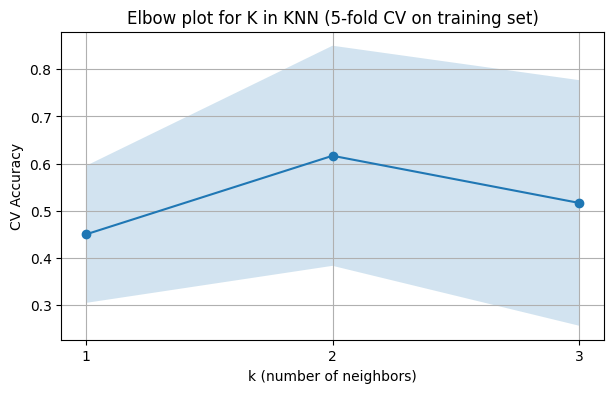

In [2272]:
plt.figure(figsize=(7,4))
plt.plot(k_values, cv_means, marker="o")
plt.fill_between(k_values,
                 np.array(cv_means) - np.array(cv_stds),
                 np.array(cv_means) + np.array(cv_stds),
                 alpha=0.2)
plt.xlabel("k (number of neighbors)")
plt.ylabel("CV Accuracy")
plt.title("Elbow plot for K in KNN (5-fold CV on training set)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [2273]:
# Pick k with highest mean accuracy; if tie, smallest k
best_idx = int(np.argmax(cv_means))
k_opt = k_values[best_idx]
print(f"Optimal k by CV mean accuracy: {k_opt} (mean={cv_means[best_idx]:.4f}, std={cv_stds[best_idx]:.4f})")

Optimal k by CV mean accuracy: 2 (mean=0.6167, std=0.2333)


**The best k is 2 because...** it had achieved the highest mean cross-validation accuracy of 0.6167 while the standard deviation was low at 0.2333. This means that the model was pretty consistent across the folds and choosing a k that is either larger or lower decreased the mean accuracy or increased its variability. 

## **Question 3 (5 points):**
## Fit a new KNN with the optimal k and plot a confusion matrix for its performance on the test dataset using sklearn's ConfusionMatrixDisplay function.

In [2274]:
# KNN model
knn_optim = KNeighborsClassifier(n_neighbors=2)

knn_optim.fit(X_train, y_train)

y_pred_knn_optim = knn_optim.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn_optim)

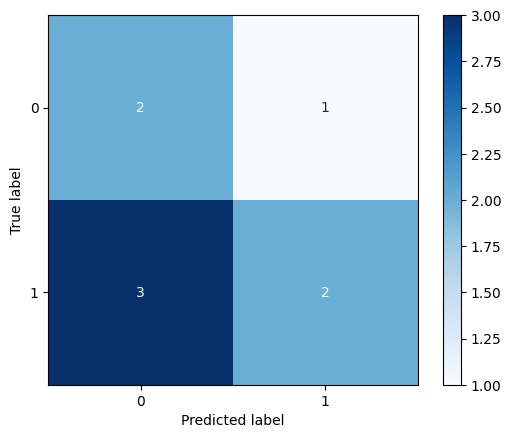

In [2275]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

## In a text markdown cell, explain which mistakes are most likely according to your confusion matrix. Which digits are more likely to be confused for each other? Do you find any interesting patterns?

**The two error types are...** false positives and false negatives. False positive is when it tries to predict 1 but the true label is 0, while false negatives is predicting 0 when the true label is 1. I would say that the mistakes that will be more likely is false negatives because it is a 3. The digits from predicted label 0 and true label 1 will likely be confused for each other. An interesting pattern I see is that the ones where the digits line up are always 2, which means that the model is slightly biased towards predicting towards the negative class, but generally does well normally.

## **Question 4 (10 points):**
## Perform 10-fold cross-validation on a vanilla KNN with the optimal k and compare the results of single split vs. 10-fold cross-validation by plotting accuracy (y-axis) against fold number (x-axis). Plot an additional horizontal line to mark the single split's accuracy on the plot.


In [2276]:
from sklearn.metrics import accuracy_score

# Single-split accuracy
knn_optim = KNeighborsClassifier(n_neighbors=2)

knn_optim.fit(X_train, y_train)
single_split_acc = knn_optim.score(X_test, y_test)

In [2277]:
# 10-fold CV on the whole dataset (same model/params)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_optim, x, y, cv=cv, scoring="accuracy")

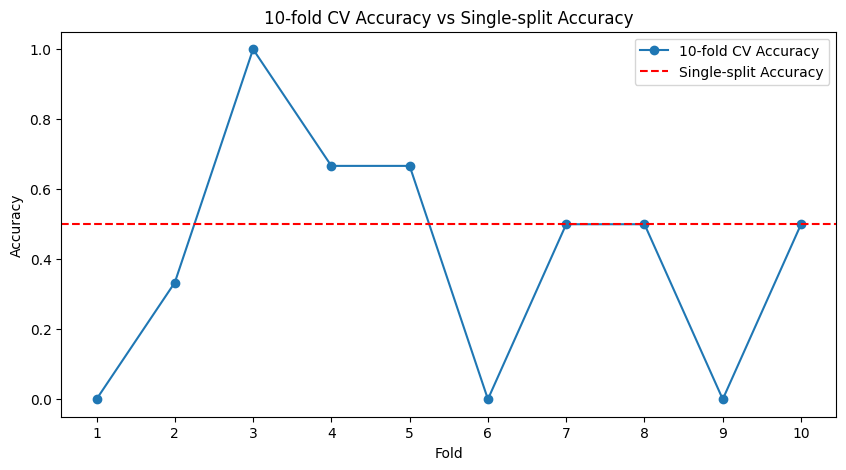

In [2278]:
# Plot with additional horizontal line
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cv_scores, marker='o', label='10-fold CV Accuracy')
plt.axhline(y=single_split_acc, color='r', linestyle='--', label='Single-split Accuracy')
plt.xticks(range(1, 11))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('10-fold CV Accuracy vs Single-split Accuracy')
plt.legend()
plt.show()

## **Question 5 (5 points):**
## Describe the effect of different fold numbers on the results of cross validation in a text markdown cell and if the results are expected. Give the average accuracy of CV scores across all folds.

## Does your plot look reasonable? Why or why not?

In [2279]:
# Average accuracy across folds
cv_scores.mean() # Accuracy is about 41.66%

np.float64(0.41666666666666663)

**Yes, my plot looks reasonable because...** the CV accuracies fluctuates around the average as well as the single split being within this range of the changes. This shows that the model is fairly stable, and the 10-fold CV gives a much more robust estimate than a single-split test that gives out one line. 